# 지수 평활법

### 1. 데이터 전처리

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(["seaborn"])

import warnings
warnings.filterwarnings(action="ignore")

from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

<ipython-input-1-5cdec8d2471b>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn"])


In [ ]:
# 플라스틱 배출량 데이터
df = pd.read_csv("/content/drive/MyDrive/Ecothon2023/data/life_all.csv", thousands=",")

df.head()

,구분1,1996 년,1997 년,1998 년,1999 년,2000 년,2001 년,2002 년,2003 년,2004 년,...,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020년,2021년
0,강원,59.0,37.9,40.9,63.0,66.0,91.5,122.1,102.0,123.1,...,169.7,153.5,204.1,161.7,137.3,162.7,196.3,264.7,104507.8,114571.8
1,경기,579.0,638.3,636.8,594.0,565.6,573.9,710.3,757.8,745.7,...,816.8,803.8,842.9,847.3,1017.4,1129.9,1301.5,1572.0,674379.0,789086.5
2,경남,173.0,116.5,154.1,168.7,179.1,229.7,261.2,263.0,279.5,...,374.4,310.2,360.9,307.6,336.4,331.2,335.0,409.1,160810.0,181060.0
3,경북,59.0,72.7,84.4,112.5,114.3,103.9,111.9,149.8,194.6,...,181.1,206.9,185.6,216.1,280.5,271.0,318.6,320.6,146123.6,147046.8
4,광주,42.0,49.5,52.4,58.2,63.6,52.4,129.8,115.8,134.3,...,124.1,133.4,128.9,141.6,138.5,119.8,135.3,129.6,51582.7,73882.0


In [ ]:
# 행/열 전환
df = df.transpose()

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
1996 년,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,0.0,0.0,100.0,79.0,63.0,19.9,64.0,48.9
1997 년,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,0.0,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998 년,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,0.0,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999 년,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,0.0,66.9,145.3,75.0,96.1,22.0,70.9,53.8


In [ ]:
# 열 이름 변경
df.columns = df.iloc[0, :]

# 필요없는 행 지우기
df.drop('구분1', axis=0, inplace=True)

df.head()

구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
1996 년,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,0.0,0.0,100.0,79.0,63.0,19.9,64.0,48.9
1997 년,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,0.0,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998 년,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,0.0,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999 년,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,0.0,66.9,145.3,75.0,96.1,22.0,70.9,53.8
2000 년,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,0.0,74.3,201.9,73.3,92.5,16.2,77.7,55.1


In [ ]:
# 현재 행 이름 리스트로 가져오기
row_names = df.index.tolist()

# "1996 년" ~ "2019 년" datetime type으로 변경
new_row_names = pd.to_datetime(row_names[:24], format="%Y 년")
# "2020년" ~ "2021년" datetime type으로 변경
new_row_names = new_row_names.append(pd.to_datetime(row_names[24:], format="%Y년"))

# 행 이름에 적용
df.index = new_row_names

df.index

DatetimeIndex(['1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# index 적용
df = df.set_index(df.index)

df.head()

구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
1996-01-01,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,0.0,0.0,100.0,79.0,63.0,19.9,64.0,48.9
1997-01-01,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,0.0,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998-01-01,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,0.0,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999-01-01,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,0.0,66.9,145.3,75.0,96.1,22.0,70.9,53.8
2000-01-01,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,0.0,74.3,201.9,73.3,92.5,16.2,77.7,55.1


In [ ]:
# 2020년 데이터, 2021년 데이터 일 수로 나누기
df.loc[['2020-01-01', '2021-01-01']] = df.loc[['2020-01-01', '2021-01-01']] / 365

df

구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
1996-01-01,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,0.0,0.0,100.0,79.0,63.0,19.9,64.0,48.9
1997-01-01,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,0.0,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998-01-01,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,0.0,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999-01-01,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,0.0,66.9,145.3,75.0,96.1,22.0,70.9,53.8
2000-01-01,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,0.0,74.3,201.9,73.3,92.5,16.2,77.7,55.1
2001-01-01,91.5,573.9,229.7,103.9,52.4,247.9,120.1,315.1,722.2,0.0,129.8,205.1,99.6,87.5,22.5,77.9,48.5
2002-01-01,122.1,710.3,261.2,111.9,129.8,233.1,156.9,294.5,649.0,0.0,150.7,216.8,122.0,86.4,24.4,79.4,48.2
2003-01-01,102.0,757.8,263.0,149.8,115.8,204.5,161.1,302.8,595.0,0.0,108.1,232.8,136.5,94.9,29.2,101.3,57.1
2004-01-01,123.1,745.7,279.5,194.6,134.3,155.5,184.0,238.4,672.4,0.0,87.2,237.4,153.5,110.5,25.4,97.7,65.0
2005-01-01,126.0,736.7,301.8,208.7,134.0,130.8,206.7,216.5,651.3,0.0,94.9,166.6,133.6,102.5,19.0,159.5,96.7


In [ ]:
# float64 타입으로 변환
df = df.astype("float64")

df.head()

구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
1996-01-01,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,0.0,0.0,100.0,79.0,63.0,19.9,64.0,48.9
1997-01-01,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,0.0,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998-01-01,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,0.0,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999-01-01,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,0.0,66.9,145.3,75.0,96.1,22.0,70.9,53.8
2000-01-01,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,0.0,74.3,201.9,73.3,92.5,16.2,77.7,55.1


### 2. 단순 지수 평활

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

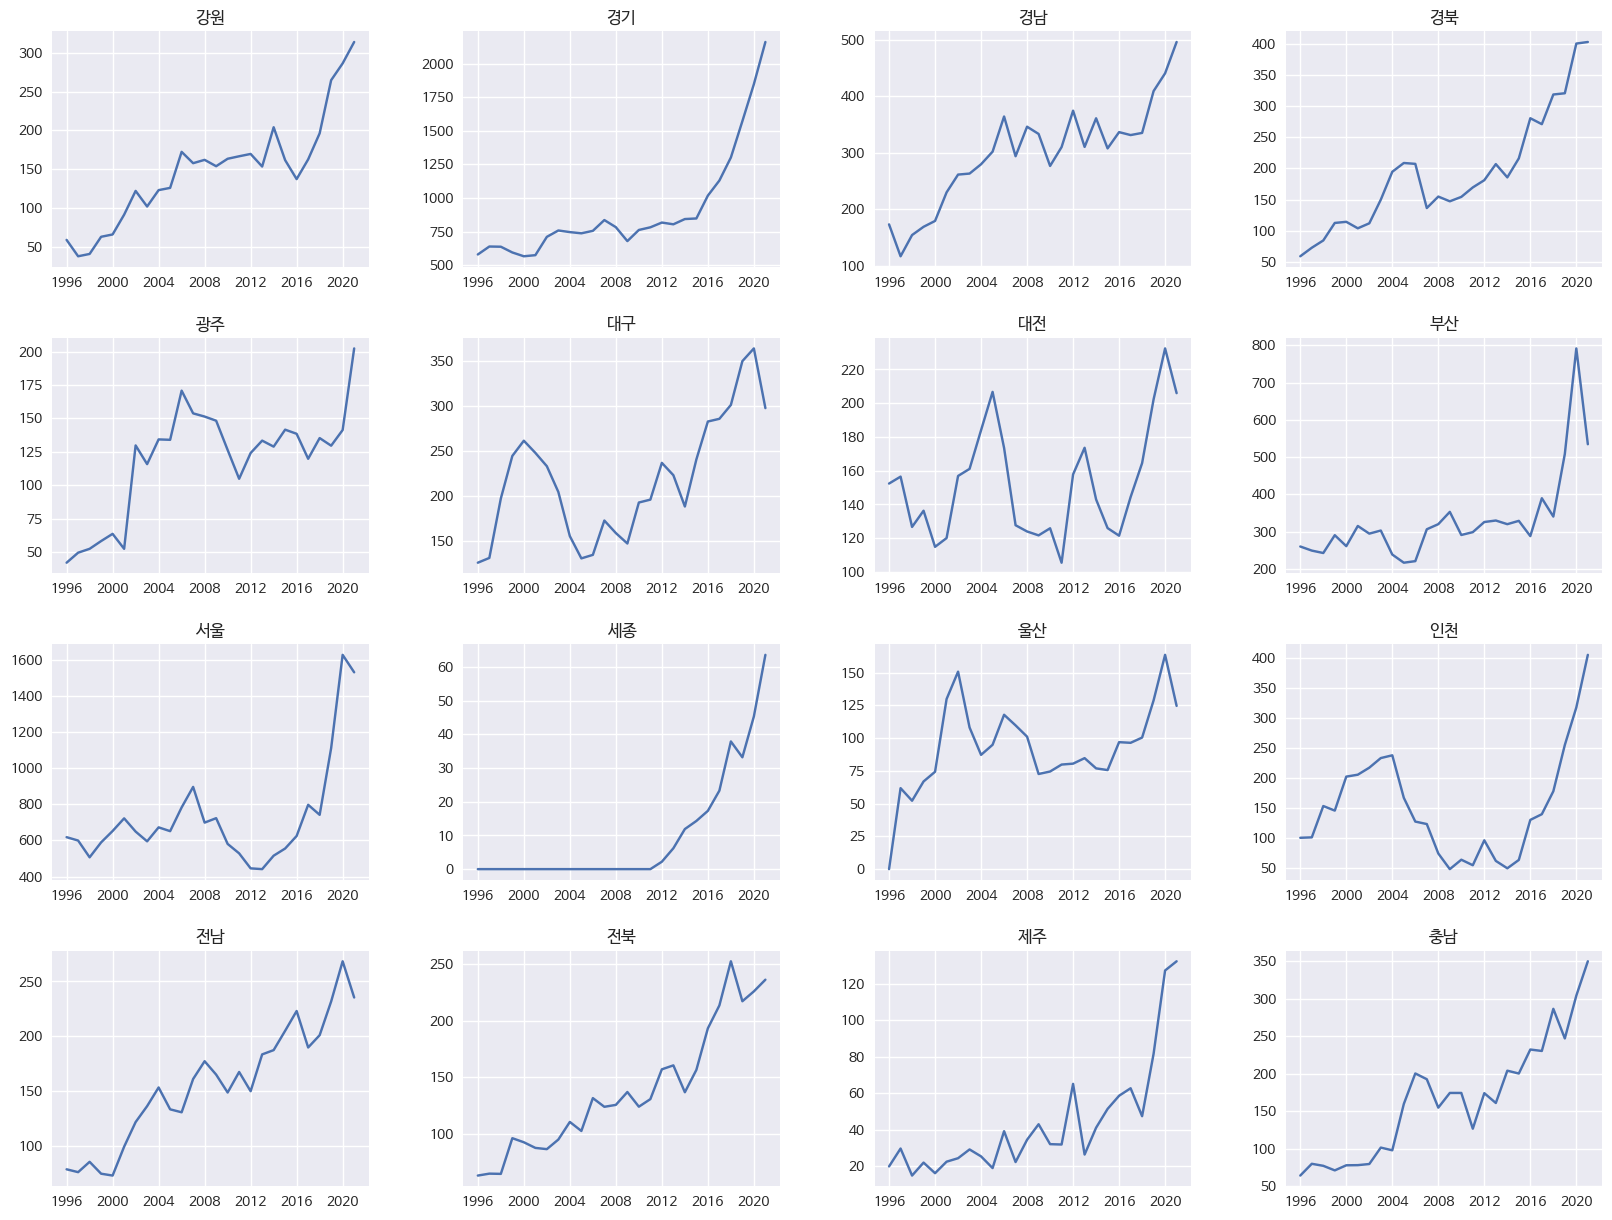

In [ ]:
# 연도별, 지역별 플라스틱 쓰레기 배출량 그래프

# matplotlib 한글 깨짐 방지
plt.rcParams['font.family'] = 'NanumBarunGothic'

# subplot 행, 열 설정
f, axes = plt.subplots(4, 4)

# 격자 크기 설정
f.set_size_inches((20, 15))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3) 

for i in range(4):
    for j in range(4):
        axes[i, j].set_title("%s" %df.columns[4*i+j])
        axes[i, j].plot(df.iloc[:, 4*i+j], marker='o', markerfacecolor='none')

In [ ]:
# 서울 연도별 플라스틱 쓰레기 배출량 지수 평활법

# 2021년만 test 데이터셋으로 분리
df_train = df["서울"].iloc[:-1]
df_test = df["서울"].iloc[-1:]

print(df_train, df_test)

1996-01-01     618.000000
1997-01-01     599.400000
1998-01-01     506.600000
1999-01-01     589.200000
2000-01-01     652.200000
2001-01-01     722.200000
2002-01-01     649.000000
2003-01-01     595.000000
2004-01-01     672.400000
2005-01-01     651.300000
2006-01-01     782.700000
2007-01-01     896.200000
2008-01-01     698.600000
2009-01-01     723.200000
2010-01-01     580.700000
2011-01-01     528.500000
2012-01-01     445.500000
2013-01-01     441.200000
2014-01-01     515.600000
2015-01-01     555.300000
2016-01-01     624.700000
2017-01-01     797.200000
2018-01-01     741.700000
2019-01-01    1111.100000
2020-01-01    1626.985753
Name: 서울, dtype: float64 2021-01-01    1530.355616
Name: 서울, dtype: float64


In [ ]:
# 라이브러리 불러오기
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# 단순 지수 평활
fit1 = SimpleExpSmoothing(df_train, 
                          initialization_method="estimated").fit()

# Holt 모형
fit2 = Holt(df_train, 
            initialization_method="estimated").fit()

# Holt 모형 지수 추세  
fit3 = Holt(df_train,
            exponential=True, 
            initialization_method="estimated").fit()

# Holt 모형 가법 추세
fit4 = Holt(df_train,
            damped_trend=True, 
            initialization_method="estimated").fit()

# Holt 모형 승법 추세
fit5 = Holt(df_train,
            exponential=True, 
            damped_trend=True, 
            initialization_method="estimated").fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

In [ ]:
# 단순 지수 평활법 요약
print(fit1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                     서울   No. Observations:                   25
Model:             SimpleExpSmoothing   SSE                         588249.841
Optimized:                       True   AIC                            255.651
Trend:                           None   BIC                            258.089
Seasonal:                        None   AICC                           257.651
Seasonal Periods:                None   Date:                 Sat, 27 May 2023
Box-Cox:                        False   Time:                         12:12:09
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              660.35062                

In [ ]:
# Holt 모형 요약
print(fit2.summary())

                              Holt Model Results                              
Dep. Variable:                     서울   No. Observations:                   25
Model:                           Holt   SSE                         464628.733
Optimized:                       True   AIC                            253.753
Trend:                       Additive   BIC                            258.628
Seasonal:                        None   AICC                           258.420
Seasonal Periods:                None   Date:                 Sat, 27 May 2023
Box-Cox:                        False   Time:                         12:12:40
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9329788                alpha                 True
smoothing_trend            0.5674277                

In [ ]:
# Holt 모형 지수 추세 요약
print(fit3.summary())

                              Holt Model Results                              
Dep. Variable:                     서울   No. Observations:                   25
Model:                           Holt   SSE                         412286.527
Optimized:                       True   AIC                            250.765
Trend:                 Multiplicative   BIC                            255.640
Seasonal:                        None   AICC                           255.432
Seasonal Periods:                None   Date:                 Sat, 27 May 2023
Box-Cox:                        False   Time:                         12:12:58
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9735807                alpha                 True
smoothing_trend            0.4636726                

In [ ]:
# Holt 모형 가법 추세
print(fit4.summary())

                              Holt Model Results                              
Dep. Variable:                     서울   No. Observations:                   25
Model:                           Holt   SSE                         465979.066
Optimized:                       True   AIC                            255.826
Trend:                       Additive   BIC                            261.920
Seasonal:                        None   AICC                           262.414
Seasonal Periods:                None   Date:                 Sat, 27 May 2023
Box-Cox:                        False   Time:                         12:13:07
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9342245                alpha                 True
smoothing_trend            0.5638150                

In [ ]:
# Holt 모형 승법 추세
print(fit5.summary())

                              Holt Model Results                              
Dep. Variable:                     서울   No. Observations:                   25
Model:                           Holt   SSE                         413347.271
Optimized:                       True   AIC                            252.829
Trend:                 Multiplicative   BIC                            258.924
Seasonal:                        None   AICC                           259.417
Seasonal Periods:                None   Date:                 Sat, 27 May 2023
Box-Cox:                        False   Time:                         12:13:16
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9624428                alpha                 True
smoothing_trend            0.4766136                

In [ ]:
## 지수 평활법 시계열 적합 모델의 속성값 조회
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"],
                     columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])

results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]

results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.932979,0.973581,0.934224,0.962443
$\beta$,NaN,0.567428,0.463673,0.563815,0.476614
$\phi$,NaN,NaN,NaN,0.976544,0.990297
$l_0$,660.350625,640.266792,642.638032,641.987020,649.730276
$b_0$,NaN,-23.115689,0.961813,-18.744308,0.965836
SSE,588249.841055,464628.733040,412286.526808,465979.066306,413347.270932


In [ ]:
# 라이브러리 불러오기
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

# 고정 계절 변동에 대한 추가 모델
fit6 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='add').fit(optimized=True, use_brute=True)

# 계절 변동 증가를 위한 곱셈 모델
fit7 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='mul').fit(optimized=True, use_brute=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
# forecast() 함수 사용하여 괄호 안에 예측하고자 하는 기간을 정수로 입력
forecast_1 = fit1.forecast(1)
forecast_2 = fit2.forecast(1)
forecast_3 = fit3.forecast(1)
forecast_4 = fit4.forecast(1)
forecast_5 = fit5.forecast(1)
forecast_6 = fit6.forecast(1)
forecast_7 = fit7.forecast(1)


y_test = df_test

t_p = pd.DataFrame({'test': y_test, 
                    'f1': forecast_1, 
                    'f2': forecast_2, 
                    'f3': forecast_3, 
                    'f4': forecast_4, 
                    'f5': forecast_5, 
                    'f6': forecast_6, 
                    'f7': forecast_7})

t_p

,test,f1,f2,f3,f4,f5,f6,f7
2021-01-01,1530.355616,1626.985746,1985.380643,2196.31523,1972.519109,2189.75245,1888.421745,1905.617333


In [ ]:
# 적합한 모델 객체로부터 모수 개수를 세는 함수
def num_params(model):
    n_params = 0

    for p in list(model.params.values()):
        if isinstance(p, np.ndarray):
            n_params += len(p)
            #print(p)
        elif p in [np.nan, False, None]:
            pass
        elif np.isnan(float(p)):
            pass
        else:
            n_params += 1
            #print(p)
    
    return n_params

In [ ]:
num_params(fit1)

2

In [ ]:
## train 데이터의 관측 개수
T = df_train.shape[0]
print(T)

25


In [ ]:
## 라이브러리 불러오기
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

def SSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sum((y_test - y_pred)**2)

def ME(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(y_test - y_pred)

def RMSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sqrt(np.mean((y_test - y_pred)**2))   
    #return np.sqrt(MSE(y_test - y_pred))

def MPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean((y_test - y_pred) / y_test) * 100

def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def AIC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + 2*k

def SBC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + k * np.log(T)

def APC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return ((T+k)/(T-k)) * sse / T

def ADJ_R2(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sst = np.sum((y_test - np.mean(y_test))**2)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    r2 = 1 - sse/sst
    return 1 - ((T - 1)/(T - k)) * (1 - r2)
    

## 모든 행렬 병합
def eval_all(y_test, y_pred, T, model):
    sse = SSE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    me = ME(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    mpe = MPE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)
    aic = AIC(y_test, y_pred, T, model)
    sbc = SBC(y_test, y_pred, T, model)
    apc = APC(y_test, y_pred, T, model)
    adj_r2 = ADJ_R2(y_test, y_pred, T, model)
    
    return [sse, mse, rmse, me, mae, mpe, mape, aic, sbc, apc, adj_r2]

In [ ]:
eval_all_df = pd.DataFrame(
    {'SES': eval_all(y_test, forecast_1, T, fit1), 
    "Holt's": eval_all(y_test, forecast_2, T, fit2), 
    'Exponential': eval_all(y_test, forecast_3, T, fit3), 
    'Trend_Add': eval_all(y_test, forecast_4, T, fit4), 
    'Trend_Mult': eval_all(y_test, forecast_5, T, fit5), 
    'Trend_Season_Add': eval_all(y_test, forecast_6, T, fit6), 
    'Trend_Season_Mult': eval_all(y_test, forecast_7, T, fit7)}
    , index=['SSE', 'MSE', 'RMSE', 'ME', 'MAE', 'MPE', 'MAPE', 'AIC', 'SBC', 'APC', 'Adj_R2'])


eval_all_df.to_excel("exponential_smoothing.xlsx")

eval_all_df

,SES,Holt's,Exponential,Trend_Add,Trend_Mult,Trend_Season_Add,Trend_Season_Mult
SSE,9337.381888,2.070478e+05,4.435022e+05,1.955086e+05,4.348042e+05,1.282114e+05,1.408214e+05
MSE,9337.381888,2.070478e+05,4.435022e+05,1.955086e+05,4.348042e+05,1.282114e+05,1.408214e+05
RMSE,96.630129,4.550250e+02,6.659596e+02,4.421635e+02,6.593968e+02,3.580661e+02,3.752617e+02
ME,-96.630129,-4.550250e+02,-6.659596e+02,-4.421635e+02,-6.593968e+02,-3.580661e+02,-3.752617e+02
MAE,96.630129,4.550250e+02,6.659596e+02,4.421635e+02,6.593968e+02,3.580661e+02,3.752617e+02
MPE,-6.314227,-2.973329e+01,-4.351666e+01,-2.889286e+01,-4.308782e+01,-2.339758e+01,-2.452121e+01
MAPE,6.314227,2.973329e+01,4.351666e+01,2.889286e+01,4.308782e+01,2.339758e+01,2.452121e+01
AIC,152.072634,2.335457e+02,2.525896e+02,2.341121e+02,2.540944e+02,2.475640e+02,2.499093e+02
SBC,154.510386,2.384212e+02,2.574651e+02,2.402065e+02,2.601888e+02,2.682849e+02,2.706302e+02
APC,438.450976,1.143692e+04,2.449822e+04,1.173051e+04,2.608825e+04,2.692438e+04,2.957248e+04


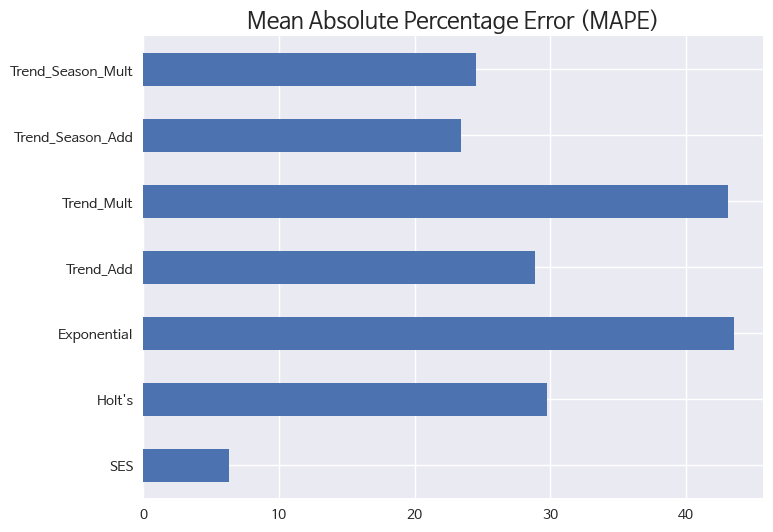

In [ ]:
# MAPE값 그래프
eval_all_df.loc['MAPE', :].plot(kind='barh', figsize=[8, 6])
plt.title('Mean Absolute Percentage Error (MAPE)', fontsize=16)
plt.show()

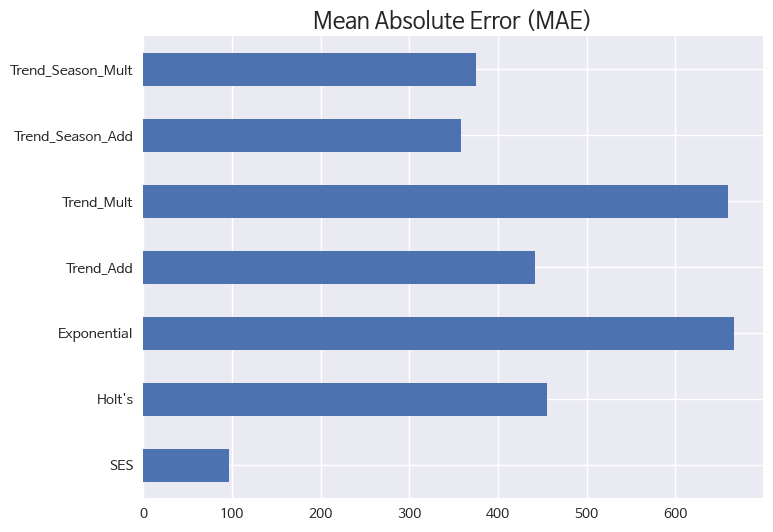

In [ ]:
# MAE값 그래프
eval_all_df.loc['MAE', :].plot(kind='barh', figsize=[8, 6])
plt.title('Mean Absolute Error (MAE)', fontsize=16)
plt.show()

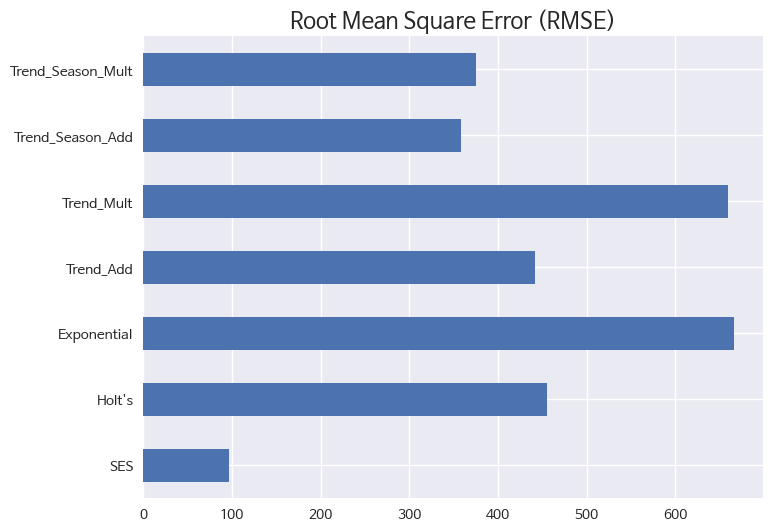

In [ ]:
# RMSE값 그래프
eval_all_df.loc['RMSE', :].plot(kind='barh', figsize=[8, 6])
plt.title('Root Mean Square Error (RMSE)', fontsize=16)
plt.show()